In [1]:
!git clone https://github.com/kaijia2022/CSE151A-Project-Repo.git

Cloning into 'CSE151A-Project-Repo'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 45 (delta 14), reused 9 (delta 3), pack-reused 0
Receiving objects: 100% (45/45), 7.02 MiB | 4.79 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("/content/CSE151A-Project-Repo/cleaned_star_data.csv")
print(df)

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     Star type Star color Spectral Clas

In [ ]:
# The details of our data
df.describe().round(2)
df.drop

<bound method DataFrame.drop of      Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     Star type Star color Spectral Class  
0            0        Red              M  
1            0        Red              M  
2            0        Red              M  
3            0        Red              M  
4            0        Red              M  
..         ...        ...            ...  
235          5       Blue              O  
236          5       Blue              O  
237          5      White              A  
238          5      White              A  
239          5       Blue              O  

[240 rows x 7 columns]>

<Axes: xlabel='Star type', ylabel='Count'>

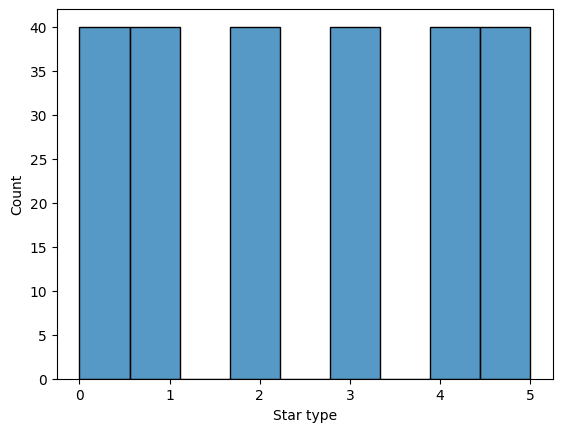

In [ ]:
# column distributions of the target we are going to predict
sns.histplot(df["Star type"])

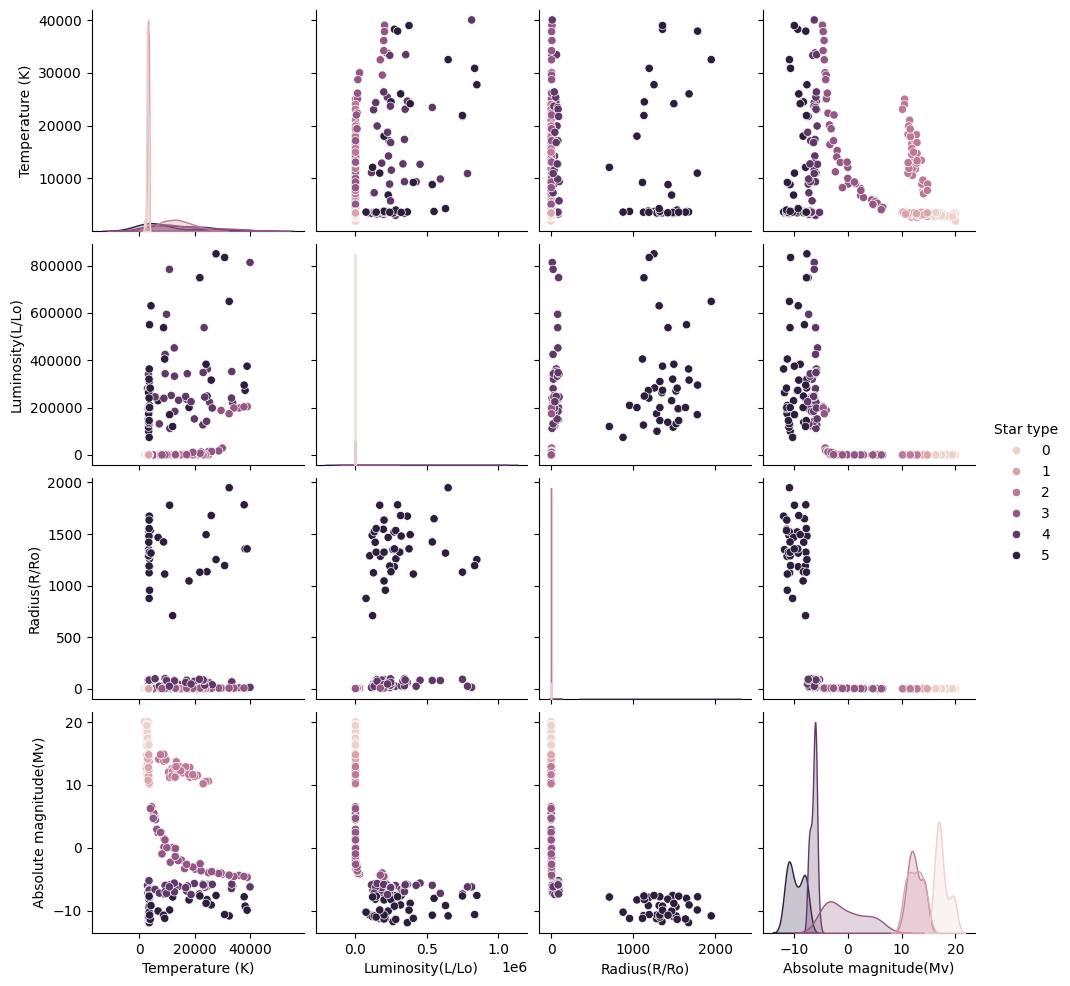

In [ ]:
sns.pairplot(df, hue="Star type")

In [3]:
df.drop(columns = {"Spectral Class", "Star color"}, axis=1).corr()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Using pandas build in function get_dummies to encode the Class
oneHot_color = pd.get_dummies(df["Star color"], columns=['Star color'])
oneHot_class = pd.get_dummies(df["Spectral Class"], columns=['Spectral Class'])

# Drop the "Star color" and "Spectral Class" columns to normalize the other features
features = df.drop('Star color', axis=1)
features = features.drop("Spectral Class", axis=1)
scaler = MinMaxScaler()
normal = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Concatenate the normalized data and encoding data
processd_df = pd.concat([normal, oneHot_color, oneHot_class], axis=1)
processd_df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Blue,Blue-White,Red,White,Yellow-White,A,B,F,G,K,M,O
0,0.029663,2.731275e-09,0.000083,0.876798,0.0,0,0,1,0,0,0,0,0,0,0,1,0
1,0.028980,4.944550e-10,0.000075,0.891807,0.0,0,0,1,0,0,0,0,0,0,0,1,0
2,0.017367,2.590003e-10,0.000048,0.957473,0.0,0,0,1,0,0,0,0,0,0,0,1,0
3,0.022622,1.412729e-10,0.000078,0.893371,0.0,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,6.828189e-11,0.000049,1.000000,0.0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.972150,4.412776e-01,0.695919,0.062226,1.0,1,0,0,0,0,0,0,0,0,0,0,1
236,0.759307,9.818959e-01,0.612777,0.040338,1.0,1,0,0,0,0,0,0,0,0,0,0,1
237,0.181025,6.327765e-01,0.730304,0.037211,1.0,0,0,0,1,0,1,0,0,0,0,0,0
238,0.191692,4.767253e-01,0.570694,0.021576,1.0,0,0,0,1,0,1,0,0,0,0,0,0


In [5]:
# Train and test data
from sklearn.model_selection import train_test_split

X = processd_df.drop(['Star type'], axis=1)
y = processd_df['Star type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

yhat_train = linear_model.predict(X_train)
yhat_test = linear_model.predict(X_test)

#print(f'Train data MSE error: {mean_squared_error(y_train, yhat_train)}')
# print(f'Test data MSE error: {mean_squared_error(y_test, yhat_test)}')

In [35]:
import numpy as np
#print(yhat_train.shape)
#print(np.array(y_train).shape)
y_train_error = ((yhat_train - np.array(y_train))**2).sum()
y_test_error = ((yhat_test - np.array(y_test))**2).sum()

print(f'Train data MSE error: {y_train_error}')
print(f'Test data MSE error: {y_test_error}')

Train data MSE error: 0.7804582401075093
Test data MSE error: 0.20585573630451803
